In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [42]:
df = pd.read_csv('bike_coll_rate.csv', low_memory=False)

In [43]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,156425.0,0.003503,40.59,-73.95
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,9874.0,0.055494,40.68,-73.97
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,2909.0,0.188362,40.88,-73.88
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,24005.0,0.022826,40.71,-73.99
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,11984.0,0.045723,40.81,-73.94


In [44]:
df[df['Collision Rate'] > 18].head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
2381,06/21/2016,11:00,BROOKLYN,11211.0,40.711167,-73.948892,"(40.7111671,-73.9488916)",LORIMER STREET,GRAND STREET,,1,0,0,0,1,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3466065,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,550.0,18.929016,40.71,-73.95
3435,04/08/2016,17:50,BROOKLYN,11211.0,40.711167,-73.948892,"(40.7111671,-73.9488916)",GRAND STREET,LORIMER STREET,,1,0,0,0,1,0,0,0,Passenger Distraction,Passenger Distraction,NaN,NaN,NaN,3421470,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,550.0,18.929016,40.71,-73.95
5289,10/16/2015,22:20,BROOKLYN,11211.0,40.711167,-73.948892,"(40.7111671,-73.9488916)",GRAND STREET,LORIMER STREET,NaN,1,0,0,0,1,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3316534,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,550.0,18.929016,40.71,-73.95
5654,09/24/2015,8:58,BROOKLYN,11211.0,40.711167,-73.948892,"(40.7111671,-73.9488916)",GRAND STREET,LORIMER STREET,NaN,1,0,0,0,1,0,0,0,Passenger Distraction,Passenger Distraction,NaN,NaN,NaN,3302816,VAN,BICYCLE,NaN,NaN,NaN,550.0,18.929016,40.71,-73.95
7056,07/16/2015,8:30,BROOKLYN,11211.0,40.711167,-73.948892,"(40.7111671,-73.9488916)",GRAND STREET,LORIMER STREET,NaN,1,0,0,0,1,0,0,0,Lost Consciousness,Unspecified,NaN,NaN,NaN,3260103,SPORT UTILITY / STATION WAGON,BICYCLE,NaN,NaN,NaN,550.0,18.929016,40.71,-73.95


In [45]:
df[(df['LAT'] == 40.71) & (df['LONG'] == -73.95)]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
50,03/20/2017,17:00,BROOKLYN,11211.0,40.710760,-73.953140,"(40.71076,-73.95314)",BORINQUEN PLACE,SOUTH 1 STREET,NaN,1,0,0,0,1,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3635931,SPORT UTILITY / STATION WAGON,BICYCLE,NaN,NaN,NaN,550.0,1.992528,40.71,-73.95
99,03/11/2017,0:20,BROOKLYN,11206.0,40.707752,-73.946660,"(40.707752,-73.94666)",MESEROLE STREET,LEONARD STREET,NaN,1,0,0,0,1,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Unspecified,NaN,NaN,NaN,3629856,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,550.0,0.996264,40.71,-73.95
105,03/10/2017,19:05,BROOKLYN,11211.0,40.711323,-73.947250,"(40.711323,-73.94725)",GRAND STREET,LEONARD STREET,NaN,1,0,0,0,1,0,0,0,Alcohol Involvement,Unspecified,NaN,NaN,NaN,3629855,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,550.0,0.996264,40.71,-73.95
124,03/08/2017,12:15,BROOKLYN,11206,40.706650,-73.950420,"(40.70665,-73.95042)",UNION AVENUE,NaN,NaN,1,0,0,0,1,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3629157,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,550.0,0.996264,40.71,-73.95
267,02/24/2017,10:30,BROOKLYN,11211.0,40.710760,-73.953140,"(40.71076,-73.95314)",BORINQUEN PLACE,SOUTH 1 STREET,NaN,1,0,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3622913,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,550.0,1.992528,40.71,-73.95
268,02/24/2017,11:00,BROOKLYN,11211,40.710957,-73.951126,"(40.710957,-73.951126)",GRAND STREET,NaN,NaN,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3622900,BICYCLE,NaN,NaN,NaN,NaN,550.0,0.996264,40.71,-73.95
342,02/18/2017,1:25,BROOKLYN,11211.0,40.707740,-73.953610,"(40.70774,-73.95361)",SOUTH 5 STREET,HOOPER STREET,NaN,1,0,0,0,1,0,0,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,3617604,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,550.0,0.996264,40.71,-73.95
427,02/08/2017,17:35,BROOKLYN,11206.0,40.709510,-73.950880,"(40.70951,-73.95088)",UNION AVENUE,TEN EYCK STREET,NaN,0,0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3612541,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,550.0,0.996264,40.71,-73.95
646,01/14/2017,3:45,BROOKLYN,11206,40.707390,-73.948270,"(40.70739,-73.94827)",LORIMER STREET,NaN,NaN,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3601354,TAXI,BICYCLE,NaN,NaN,NaN,550.0,0.996264,40.71,-73.95
688,01/06/2017,18:15,BROOKLYN,11206.0,40.708171,-73.950658,"(40.7081706,-73.9506577)",UNION AVENUE,SCHOLES STREET,NaN,1,0,0,0,1,0,0,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,3594956,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,550.0,2.988792,40.71,-73.95


In [46]:
danger_route = df[(df['LAT'] == 40.71) & (df['LONG'] == -73.94) | (df['LAT'] == 40.71) & (df['LONG'] == -73.95) | (df['LAT'] == 40.71) & (df['LONG'] == -73.95)]

In [47]:
danger_route['Collision Rate'].mean()

4.227441542984011

In [48]:
safer_route = df[(df['LAT'] == 40.71) & (df['LONG'] == -73.94)]

In [49]:
safer_route['Collision Rate'].mean()

0.16542948898770832

In [50]:
danger_causes = danger_route[danger_route.columns[18:23]]

In [52]:
danger_causes = danger_causes.apply(pd.Series.value_counts)

In [55]:
danger_causes['CONTRIBUTING FACTOR VEHICLE 1'] = danger_causes['CONTRIBUTING FACTOR VEHICLE 1'].replace(to_replace='NaN', value=0)
danger_causes['CONTRIBUTING FACTOR VEHICLE 2'] = danger_causes['CONTRIBUTING FACTOR VEHICLE 2'].replace(to_replace='NaN', value=0)
danger_causes['CONTRIBUTING FACTOR VEHICLE 3'] = danger_causes['CONTRIBUTING FACTOR VEHICLE 3'].replace(to_replace='NaN', value=0)
danger_causes['CONTRIBUTING FACTOR VEHICLE 4'] = danger_causes['CONTRIBUTING FACTOR VEHICLE 4'].replace(to_replace='NaN', value=0)
danger_causes['CONTRIBUTING FACTOR VEHICLE 5'] = danger_causes['CONTRIBUTING FACTOR VEHICLE 5'].replace(to_replace='NaN', value=0)

In [57]:
danger_causes = danger_causes['CONTRIBUTING FACTOR VEHICLE 1'] + danger_causes['CONTRIBUTING FACTOR VEHICLE 2'] + danger_causes['CONTRIBUTING FACTOR VEHICLE 3'] + danger_causes['CONTRIBUTING FACTOR VEHICLE 4'] + danger_causes['CONTRIBUTING FACTOR VEHICLE 5']



In [58]:
danger_causes

Aggressive Driving/Road Rage                               4.0
Alcohol Involvement                                        5.0
Backing Unsafely                                           2.0
Brakes Defective                                           1.0
Driver Inattention/Distraction                            60.0
Driver Inexperience                                        4.0
Failure to Yield Right-of-Way                             73.0
Fatigued/Drowsy                                           11.0
Following Too Closely                                      1.0
Glare                                                      1.0
Lane Marking Improper/Inadequate                           1.0
Lost Consciousness                                        23.0
Other Electronic Device                                    1.0
Other Vehicular                                           10.0
Outside Car Distraction                                    4.0
Oversized Vehicle                                      

In [59]:
danger_causes = danger_causes.drop(danger_causes.index[25])

In [93]:
danger_causes = danger_causes.nlargest(3)

In [94]:
danger_causes

Failure to Yield Right-of-Way     73.0
Driver Inattention/Distraction    60.0
Passenger Distraction             40.0
dtype: float64

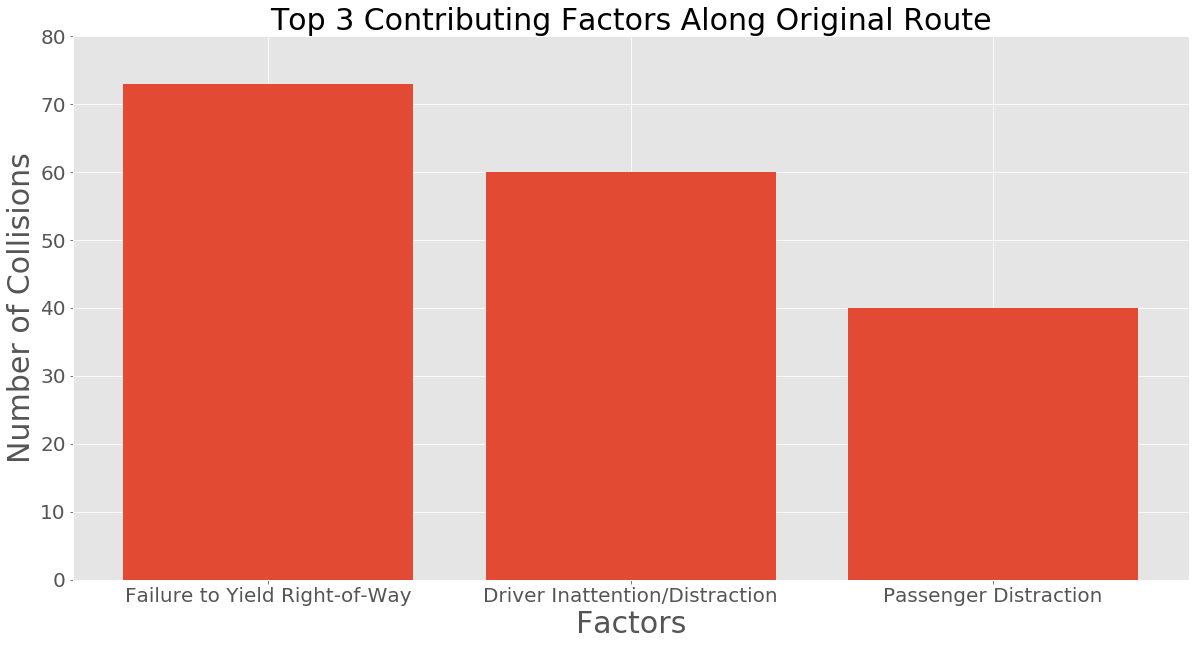

In [105]:
plt.bar(range(len(danger_causes)), danger_causes.values, align='center')
plt.tick_params(axis='y', labelsize=20)
plt.ylim([0,80])
plt.xticks(range(len(danger_causes)), danger_causes.index.values, fontsize=20 , rotation=0)
plt.title('Top 3 Contributing Factors Along Original Route', size=30)
plt.xlabel('Factors', size=30)
plt.ylabel('Number of Collisions', size=30)
plt.show()

In [83]:
safer_causes = safer_route[safer_route.columns[18:23]]

In [84]:
safer_causes = safer_causes.apply(pd.Series.value_counts)

In [85]:
safer_causes['CONTRIBUTING FACTOR VEHICLE 1'] = safer_causes['CONTRIBUTING FACTOR VEHICLE 1'].replace(to_replace='NaN', value=0)
safer_causes['CONTRIBUTING FACTOR VEHICLE 2'] = safer_causes['CONTRIBUTING FACTOR VEHICLE 2'].replace(to_replace='NaN', value=0)
safer_causes['CONTRIBUTING FACTOR VEHICLE 3'] = safer_causes['CONTRIBUTING FACTOR VEHICLE 3'].replace(to_replace='NaN', value=0)
safer_causes['CONTRIBUTING FACTOR VEHICLE 4'] = safer_causes['CONTRIBUTING FACTOR VEHICLE 4'].replace(to_replace='NaN', value=0)
safer_causes['CONTRIBUTING FACTOR VEHICLE 5'] = safer_causes['CONTRIBUTING FACTOR VEHICLE 5'].replace(to_replace='NaN', value=0)

In [86]:
safer_causes = safer_causes['CONTRIBUTING FACTOR VEHICLE 1'] + safer_causes['CONTRIBUTING FACTOR VEHICLE 2'] + safer_causes['CONTRIBUTING FACTOR VEHICLE 3'] + safer_causes['CONTRIBUTING FACTOR VEHICLE 4'] + safer_causes['CONTRIBUTING FACTOR VEHICLE 5']



In [87]:
safer_causes

Aggressive Driving/Road Rage                               2.0
Alcohol Involvement                                        1.0
Driver Inattention/Distraction                            24.0
Driver Inexperience                                        4.0
Failure to Yield Right-of-Way                             24.0
Fatigued/Drowsy                                            6.0
Following Too Closely                                      1.0
Lane Marking Improper/Inadequate                           1.0
Lost Consciousness                                        10.0
Other Vehicular                                            5.0
Outside Car Distraction                                    2.0
Oversized Vehicle                                          2.0
Passenger Distraction                                     13.0
Passing or Lane Usage Improper                             2.0
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      5.0
Physical Disability                                    

In [88]:
safer_causes = safer_causes.drop(safer_causes.index[19])

In [97]:
safer_causes = safer_causes.nlargest(3)

In [98]:
safer_causes

Driver Inattention/Distraction    24.0
Failure to Yield Right-of-Way     24.0
Physical Disability               14.0
dtype: float64

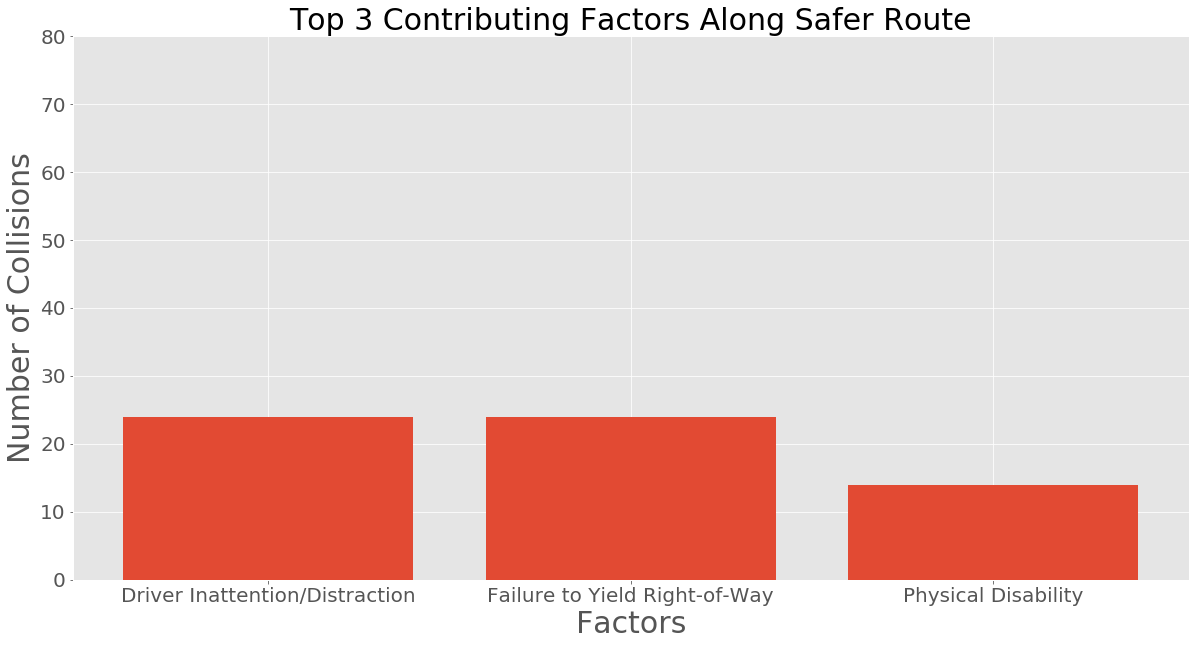

In [106]:
plt.bar(range(len(safer_causes)), safer_causes.values, align='center')
plt.tick_params(axis='y', labelsize=20)
plt.ylim([0,80])
plt.xticks(range(len(safer_causes)), safer_causes.index.values, fontsize=20 , rotation=0)
plt.title('Top 3 Contributing Factors Along Safer Route', size=30)
plt.xlabel('Factors', size=30)
plt.ylabel('Number of Collisions', size=30)
plt.show()